<a href="https://colab.research.google.com/github/simran1362/HousePricePrediction/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [ ]:
print(boston_dataset.DESCR)

In [ ]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston['MEDV'] = boston_dataset.target

In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

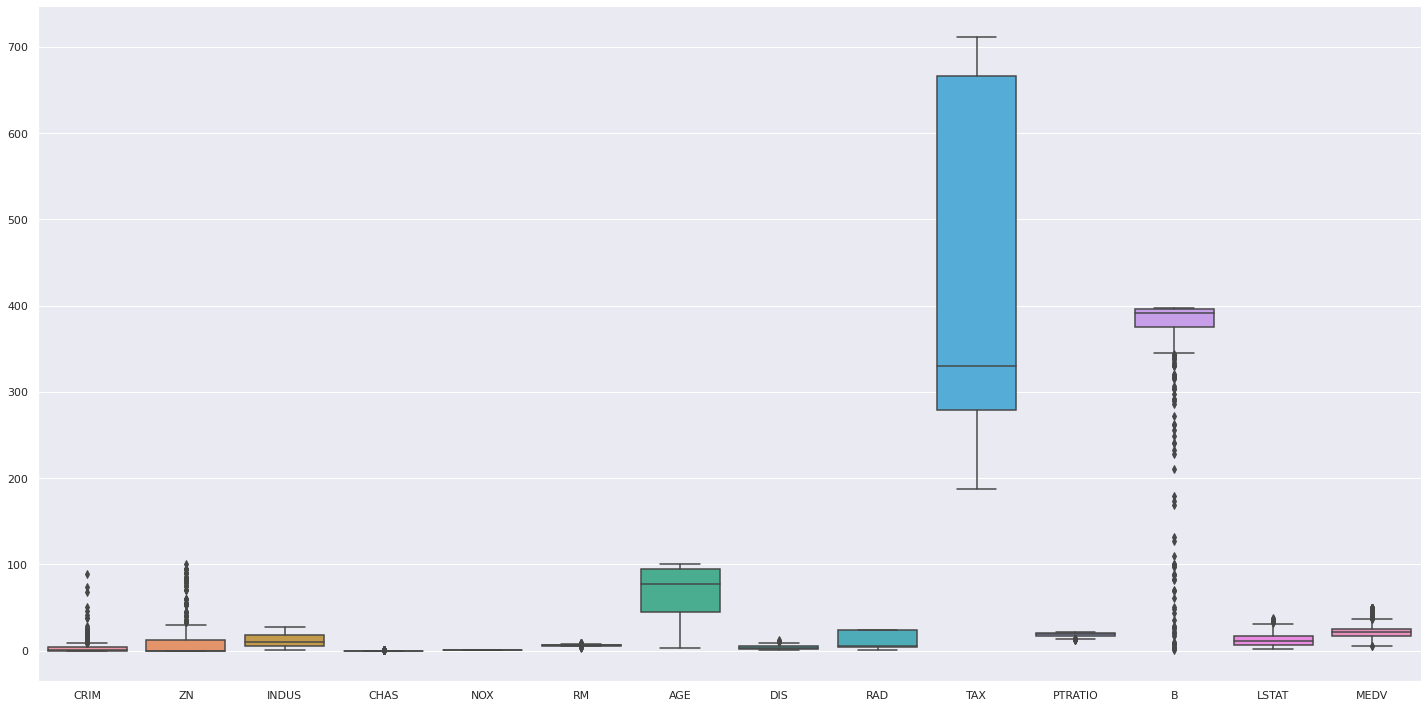

In [ ]:
sns.catplot(data=boston, height=10, aspect=2, kind="box")

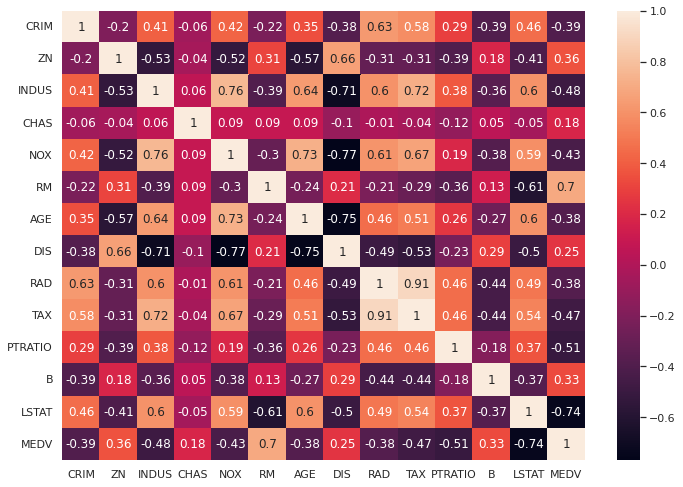

In [ ]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


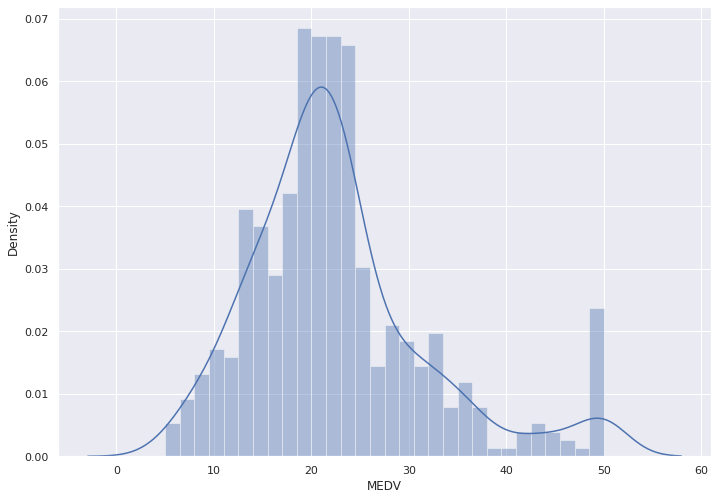

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x = boston[['NOX','RM','DIS','PTRATIO','LSTAT' ]]
y = boston['MEDV']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.33, random_state = 5)
x_train.head()

,NOX,RM,DIS,PTRATIO,LSTAT
435,0.740,6.629,2.1247,20.2,23.27
88,0.489,7.007,3.4217,17.8,5.50
365,0.718,3.561,1.6132,20.2,7.12
242,0.428,6.358,7.0355,16.6,11.22
461,0.713,6.376,2.5671,20.2,14.65


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
226,37.6,37.353859
292,27.9,28.379225
90,22.6,27.528324
373,13.8,3.187268
273,35.2,32.152386
...,...,...
48,14.4,8.794235
281,35.4,33.997554
42,25.3,26.210578
115,18.3,21.350587


In [ ]:
metrics.mean_absolute_error(y_test, y_pred)

3.5889376545216125

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

29.614123090495607

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

5.441885986539557

In [ ]:
metrics.r2_score(y_test, y_pred)

0.6840953220739522

Text(0, 0.5, 'Median Value')

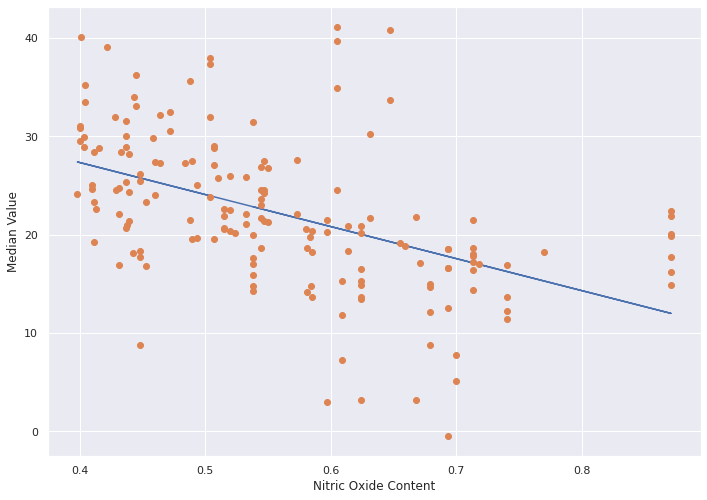

In [ ]:
import numpy as np
x = np.array(x_test['NOX'])
y = np.array(y_pred)
m,b=np.polyfit(x, y, deg=1)
plt.plot(x_test['NOX'], m*x_test['NOX'] + b)
plt.plot(x_test['NOX'],y_pred,'o')
plt.xlabel("Nitric Oxide Content")
plt.ylabel("Median Value")

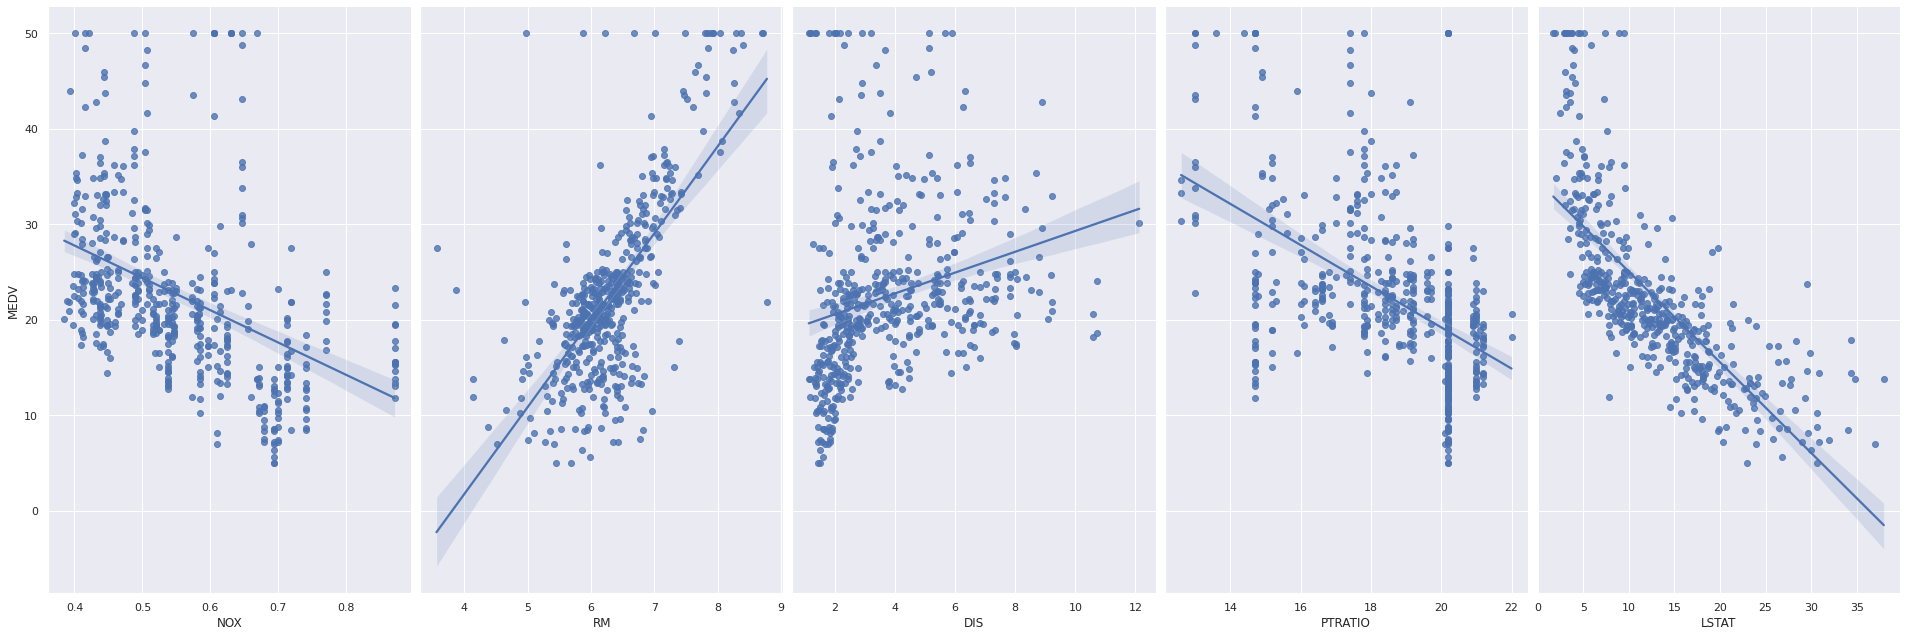

In [ ]:
sns.pairplot(boston, x_vars=['NOX','RM','DIS','PTRATIO','LSTAT'], y_vars='MEDV', height=9, aspect=0.6, kind='reg')